In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [12]:
df = pd.read_csv('EnergyConsumption.csv', parse_dates = ['Datetime'] )

In [13]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478
1,2004-12-31 02:00:00,12865
2,2004-12-31 03:00:00,12577
3,2004-12-31 04:00:00,12517
4,2004-12-31 05:00:00,12670


In [14]:
# Group by date and calculate the sum of 'AEP_MW'
df = df.groupby(df['Datetime'].dt.date)['AEP_MW'].sum().reset_index()

In [16]:
# format columns name
def format_column_names(df):
    """
    Format all column names in a DataFrame to snake_case.

    Parameters:
        df (pandas.DataFrame): DataFrame whose column names are to be formatted.

    Returns:
        pandas.DataFrame: DataFrame with column names formatted to snake_case.
    """
    formatted_columns = [col.replace(' ', '_').lower() for col in df.columns]
    df.columns = formatted_columns
    return df

In [17]:
df=format_column_names(df)

In [18]:
df.set_index('datetime', inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5055 entries, 2004-10-01 to 2018-08-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   aep_mw  5055 non-null   int64
dtypes: int64(1)
memory usage: 79.0+ KB


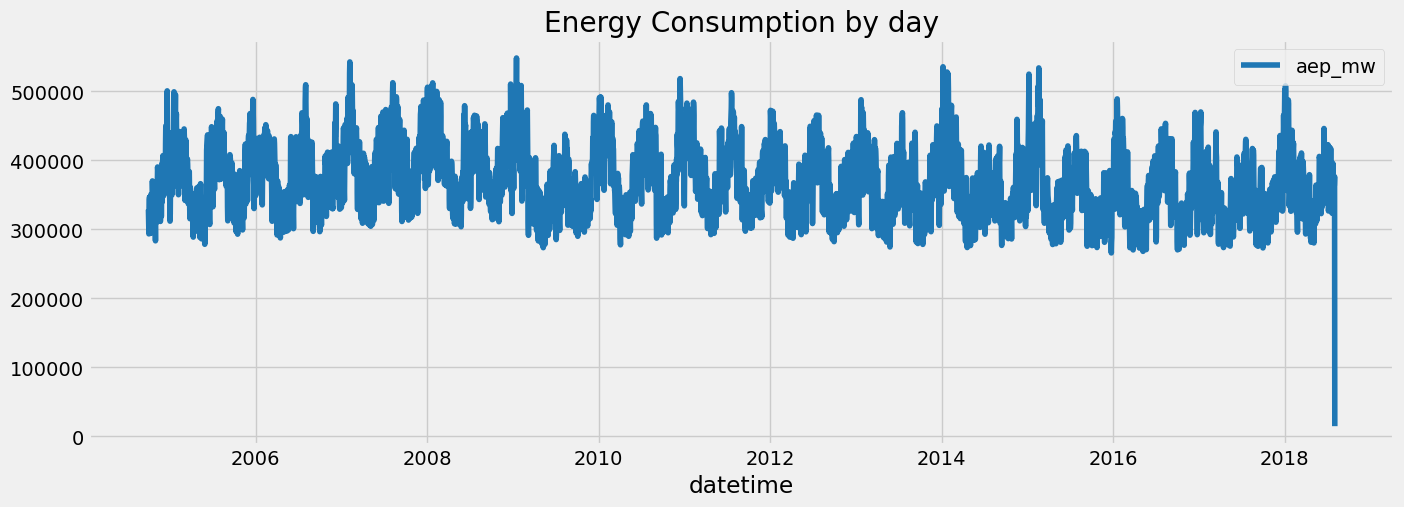

In [21]:
#plot the data
df.plot(figsize = (15, 5), color = color_pal[0], title = "Energy Consumption by day")
plt.show()

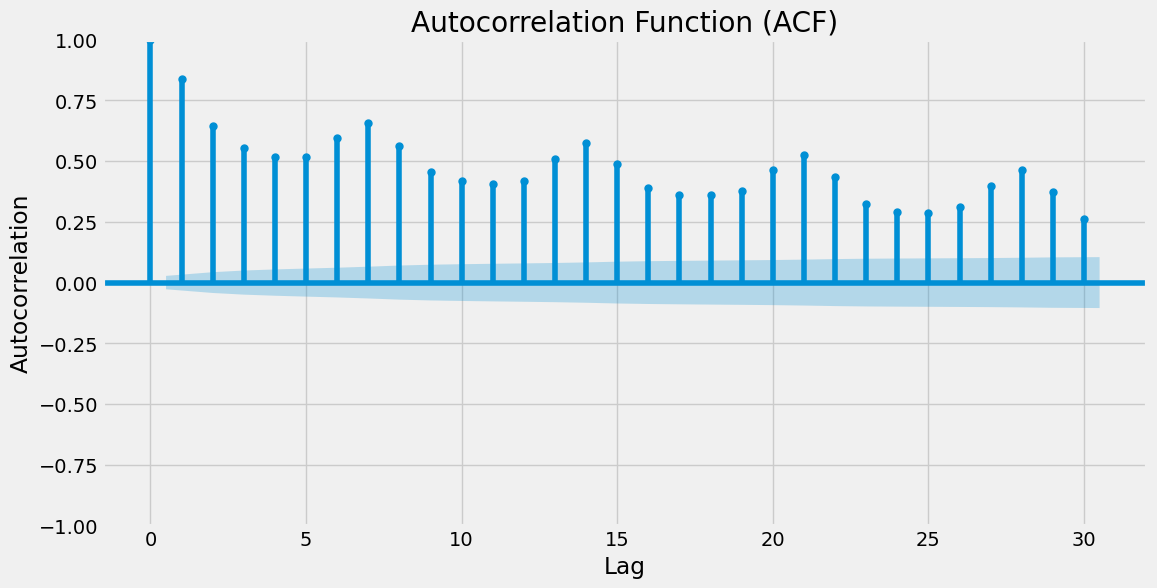

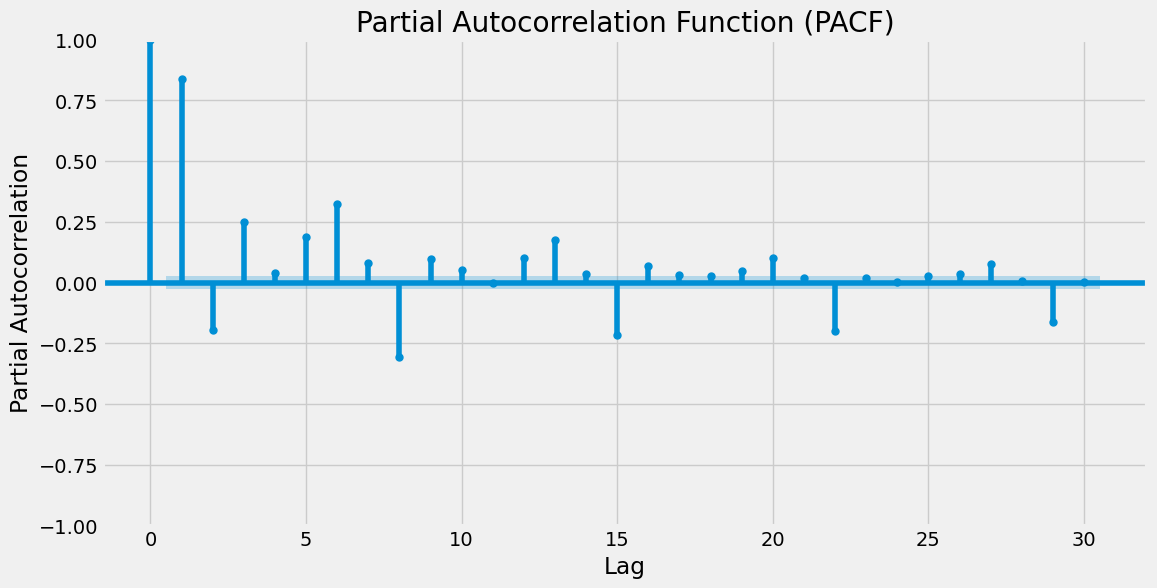

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(series, lags=None):
    # Plot ACF
    plt.figure(figsize=(12, 6))
    plot_acf(series, lags=lags, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()
    
    # Plot PACF
    plt.figure(figsize=(12, 6))
    plot_pacf(series, lags=lags, ax=plt.gca())
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

# Example usage:
# Assuming df is your DataFrame and 'Oil' is the column you want to model
plot_acf_pacf(df['aep_mw'], lags=30)  # You can adjust the number of lags as needed

In [25]:
def create_arima_model(df, column_name, p, d, q):
    # Convert the DataFrame column to a pandas Series
    series = df[column_name]
    
    # Split the data into training and testing sets (80-20 split)
    train_size = int(len(series) * 0.8)
    train, test = series[:train_size], series[train_size:]
    
    # Fit ARIMA model
    model = ARIMA(train, order=(p, d, q))
    fitted_model = model.fit()
    
    # Make predictions
    predictions = fitted_model.forecast(steps=len(test))
    
    # Visualize the training, testing, and predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train.values, label='Training Data')
    plt.plot(test.index, test.values, label='Actual Test Data')
    plt.plot(test.index, predictions, color='red', label='Predicted Test Data')
    plt.title('ARIMA Model Predictions vs Actual')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    #Forecasting another 24 months 
    final_model = ARIMA(df, order=(p,d,q)).fit()
    prediction=final_model.predict(len(df),len(df)+365)

    df.plot(legend=True, label='Train', figsize=(10,6))
    prediction.plot(legend=True, label='prediction')
    
    # Calculate and print RMSE
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print("Root Mean Squared Error (RMSE):", rmse)

c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


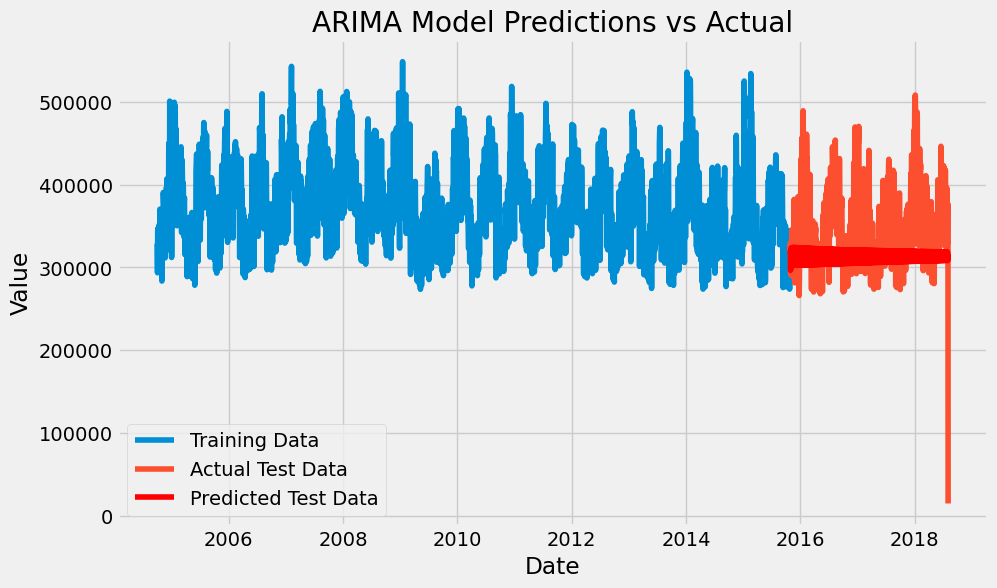

c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\hamin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (RMSE): 59552.29807409619


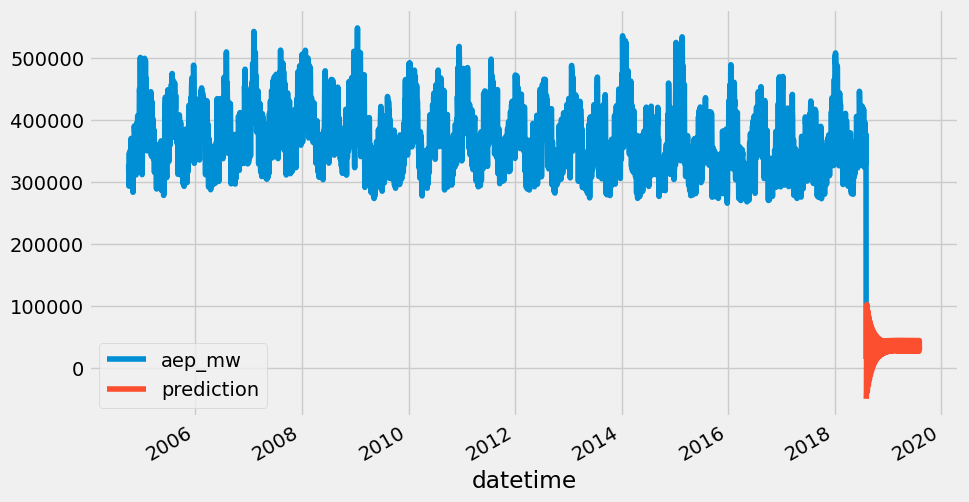

In [26]:
create_arima_model(df, 'aep_mw', 5,1,4)